In [37]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12, 8)})

In [88]:
with open("random_nfa_from_matrices.pkl", "rb") as fd:
    data = pickle.load(fd)
df = pd.DataFrame(data)
df["density"] = df.accepted_counts.map(lambda x: [xi / 2**i for i,xi in enumerate(x, 1)])
df["last_density"] = df.density.map(lambda x: x[-1])
df["last_count"] = df.accepted_counts.map(lambda x: x[-1])
df["probably_exp"] = df.density.map(lambda x: (x[-2] - x[-1]) < 1e-6 and x[-1] > 0)

In [89]:
df

,sparsity,matrix,accepted_counts,height,density,last_density,last_count,probably_exp
0,0.576617,"[[0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",inf,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0,False
1,0.518914,"[[0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 0], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0,False
2,0.616396,"[[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [...","[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 204...",inf,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,32768,True
3,0.913391,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ...","[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144,...",inf,"[0.0, 0.25, 0.125, 0.125, 0.09375, 0.078125, 0...",0.011505,377,False
4,0.829754,"[[0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",inf,"[0.5, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015...",0.000061,2,False
...,...,...,...,...,...,...,...,...
4995,0.586368,"[[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, ...","[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 204...",inf,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,32768,True
4996,0.994208,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",1.0,"[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015...",0.000061,2,False
4997,0.868642,"[[0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], [0, 0...","[2, 3, 5, 10, 22, 41, 84, 167, 333, 667, 1332,...",inf,"[1.0, 0.75, 0.625, 0.625, 0.6875, 0.640625, 0....",0.650116,21303,False
4998,0.677667,"[[0, 0], [1, 1], [1, 1], [1, 1], [1, 0], [0, 1]]","[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, ...",inf,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",0.500000,16384,True


<AxesSubplot:xlabel='sparsity', ylabel='last_density'>

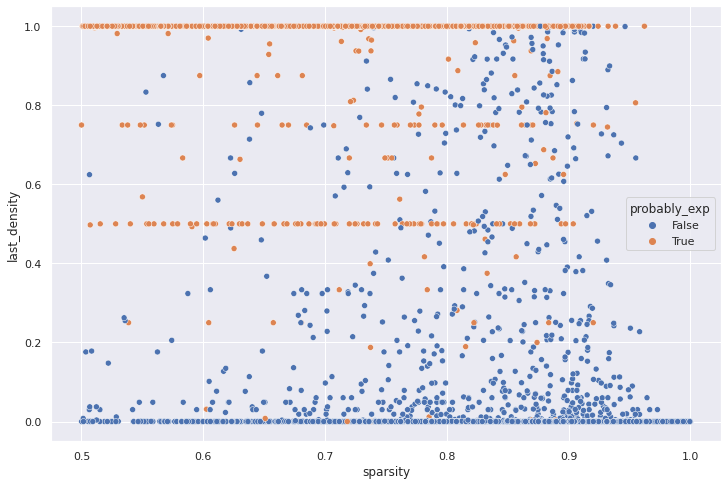

In [90]:
sns.scatterplot(data=df, x="sparsity", y="last_density", hue="probably_exp")

/home/victor/Documentos/Ramos/iPre/count-nfa/venv/lib/python3.8/site-packages/matplotlib/colors.py:1202: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


<AxesSubplot:xlabel='sparsity', ylabel='last_density'>

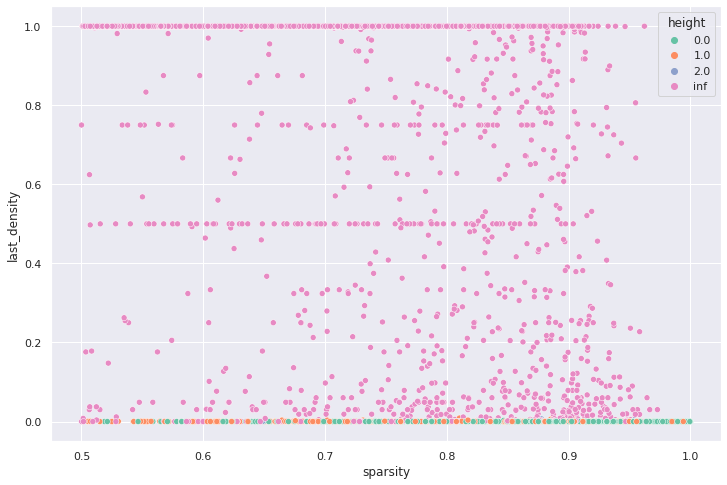

In [91]:
sns.scatterplot(data=df, x="sparsity", y="last_density", hue="height", palette="Set2")

<AxesSubplot:xlabel='sparsity', ylabel='last_count'>

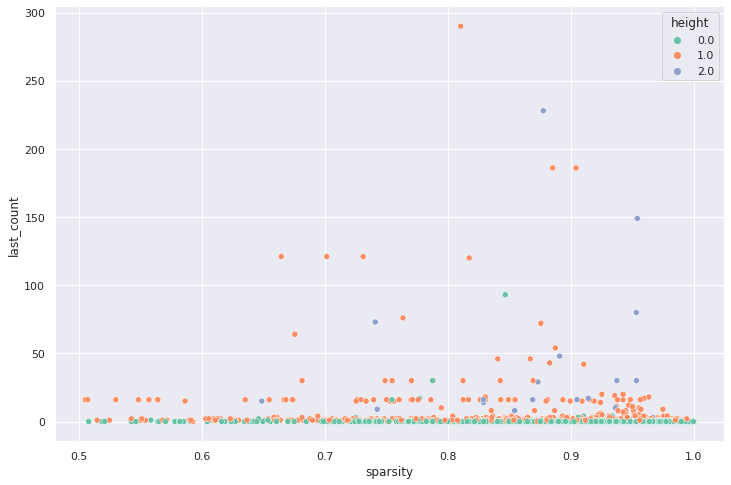

In [93]:
# sns.scatterplot(data=df, x="sparsity", y="last_count", hue="height", palette="Set2")
sns.scatterplot(data=df[df.height != float("inf")], x="sparsity", y="last_count", hue="height", palette="Set2")

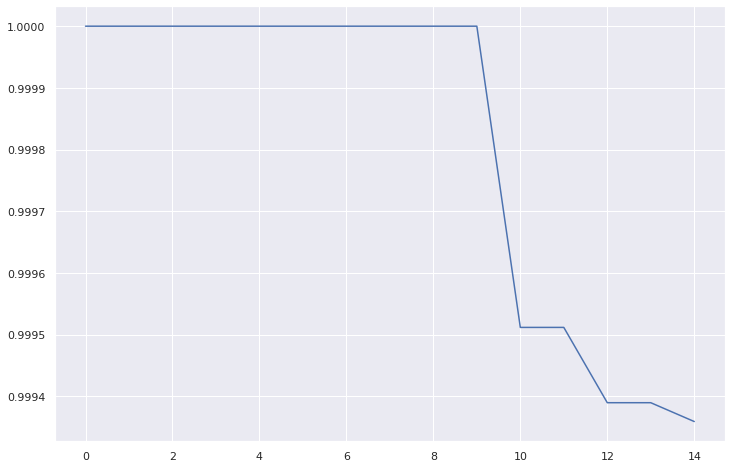

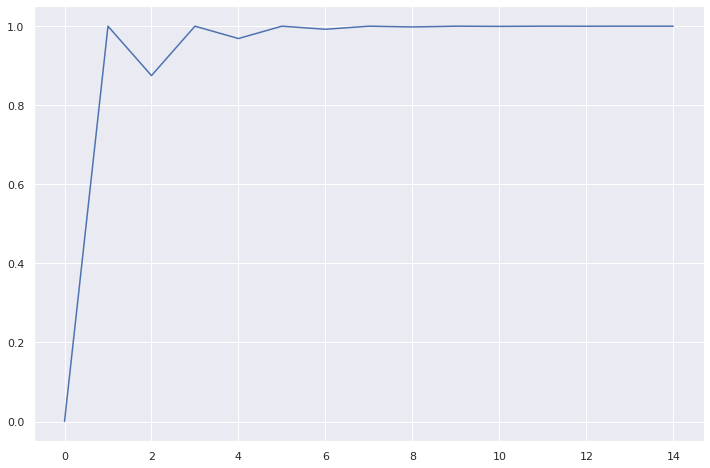

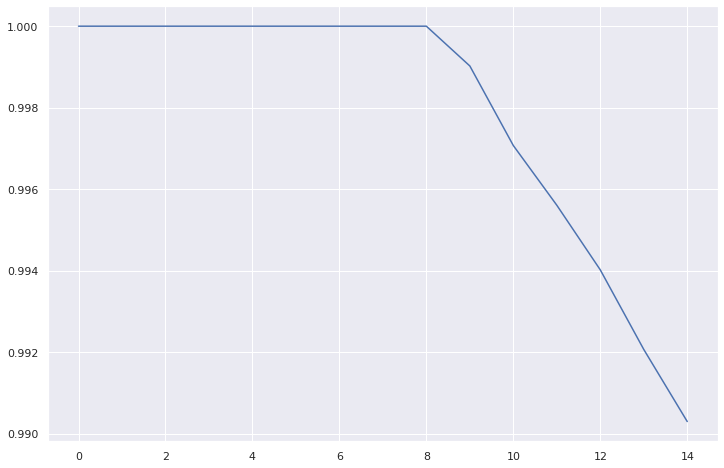

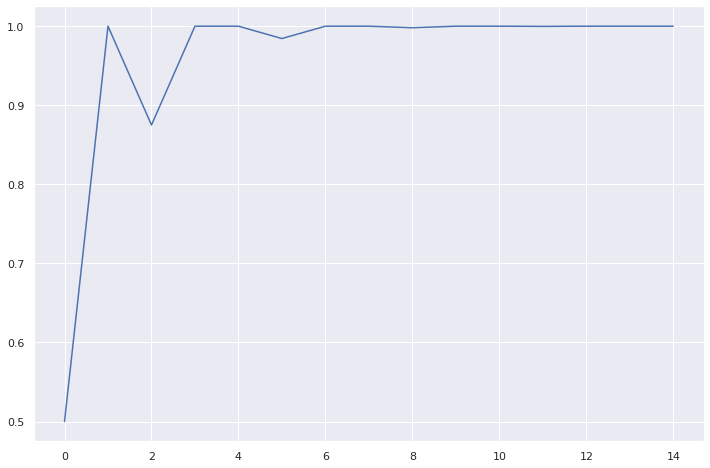

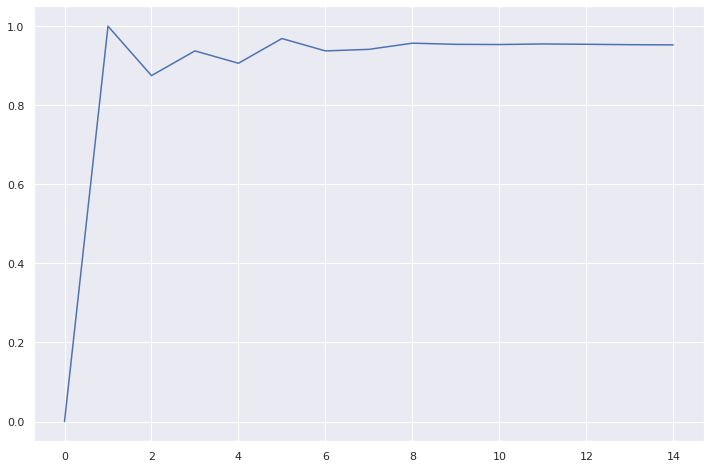

In [75]:
for row in df[(df.probably_exp == False) & (df.last_density > 0.9)].density.tolist()[:5]:
    plt.plot(row)
    plt.show()